**Plot a cub with dimensions x,y,z respectively: 2.5,3.5,4.5 with center located at point (0,0,0).**

In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection


class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def to_vector(self):
        return [self.x, self.y]


class Point3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.w = 1

    def to_vector(self):
        return (self.x, self.y, self.z)
    
    def to_np_array(self):
        return np.array([self.x, self.y, self.z])

    def out_of_camera(self):
        return self.z <= 0

    def update_from_vector(self, vector):
        self.x = vector[0]
        self.y = vector[1]
        self.z = vector[2]
        self.w = vector[3]


class Polygon:
    def __init__(self, vectors, color):
        self.vectors = vectors
        self.color = color
        self.points = self.set_points()

    def set_points(self):
        return [x for x in self.vectors]

    def dist_to_observator(self):
        pt = Point3D(np.sum(map(lambda point: point.x, self.points))/len(self.points),
                   np.sum(map(lambda point: point.y, self.points))/len(self.points),
                   np.sum(map(lambda point: point.z, self.points))/len(self.points))
        distance = np.sqrt(pt.x**2 + pt.y**2 + pt.z**2)
        return distance

    def max_z(self):
        return np.max(map(lambda point: point[2], self.points))

    def min_z(self):
        return np.min(map(lambda point: point[2], self.points))
    
    def to_list(self):
        list_of_points = []
        for v in self.vectors:
            list_of_points += v.to_list()
        return list(np.array(p) for p in set(list_of_points))


class Vector:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def to_list(self):
        return (self.a.to_vector(), self.b.to_vector())


class Cuboid:
    def __init__(self, x, y, z, width, height, color):
        self.x = x
        self.y = y
        self.z = z
        self.width = width
        self.height = height
        self.color = color
        self.polygons = []
        self.create_walls()

    def create_walls(self):
        self.create_front_wall()
        self.create_back_wall()
        self.create_bottom_wall()
        self.create_top_wall()
        self.create_left_wall()
        self.create_right_wall()

    def create_front_wall(self):
        vectors = []
        vectors.append(Vector(Point3D(self.x, self.y, self.z)
                              , Point3D(self.x + self.width, self.y, self.z)))

        vectors.append(Vector(Point3D(self.x + self.width, self.y, self.z),
                              Point3D(self.x + self.width, self.y + self.height, self.z)))

        vectors.append(Vector(Point3D(self.x + self.width, self.y + self.height, self.z),
                              Point3D(self.x, self.y + self.height, self.z)))

        vectors.append(Vector(Point3D(self.x, self.y + self.height, self.z),
                              Point3D(self.x, self.y, self.z)))

        self.polygons.append(Polygon(vectors, self.color))

    def create_back_wall(self):
        vectors = []
        vectors.append(Vector(Point3D(self.x, self.y, self.z + self.height),
                              Point3D(self.x + self.width, self.y, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y, self.z + self.height),
                              Point3D(self.x + self.width, self.y + self.height, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y + self.height, self.z + self.height),
                              Point3D(self.x, self.y + self.height, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x, self.y + self.height, self.z + self.height),
                              Point3D(self.x, self.y, self.z + self.height)))
        self.polygons.append(Polygon(vectors, self.color))

    def create_bottom_wall(self):
        vectors = []
        vectors.append(Vector(Point3D(self.x, self.y, self.z),
                              Point3D(self.x, self.y, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x, self.y, self.z + self.height),
                              Point3D(self.x + self.width, self.y, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y, self.z + self.height),
                              Point3D(self.x + self.width, self.y, self.z)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y, self.z),
                              Point3D(self.x, self.y, self.z)))
        self.polygons.append(Polygon(vectors, self.color))

    def create_top_wall(self):
        vectors = []
        vectors.append(Vector(Point3D(self.x, self.y + self.height, self.z),
                              Point3D(self.x, self.y + self.height, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x, self.y + self.height, self.z + self.height),
                              Point3D(self.x + self.width, self.y + self.height, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y + self.height, self.z + self.height),
                              Point3D(self.x + self.width, self.y + self.height, self.z)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y + self.height, self.z),
                              Point3D(self.x, self.y + self.height, self.z)))
        self.polygons.append(Polygon(vectors, self.color))

    def create_left_wall(self):
        vectors = []
        vectors.append(Vector(Point3D(self.x, self.y, self.z),
                              Point3D(self.x, self.y, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x, self.y, self.z + self.height),
                              Point3D(self.x, self.y + self.height, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x, self.y + self.height, self.z + self.height),
                              Point3D(self.x, self.y + self.height, self.z)))
        vectors.append(Vector(Point3D(self.x, self.y + self.height, self.z),
                              Point3D(self.x, self.y, self.z)))
        self.polygons.append(Polygon(vectors, self.color))

    def create_right_wall(self):
        vectors = []
        vectors.append(Vector(Point3D(self.x + self.width, self.y, self.z),
                              Point3D(self.x + self.width, self.y, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y, self.z + self.height),
                              Point3D(self.x + self.width, self.y + self.height, self.z + self.height)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y + self.height, self.z + self.height),
                              Point3D(self.x + self.width, self.y + self.height, self.z)))
        vectors.append(Vector(Point3D(self.x + self.width, self.y + self.height, self.z),
                              Point3D(self.x + self.width, self.y, self.z)))
        self.polygons.append(Polygon(vectors, self.color))
        
    def get_edges(self):
        return [p.to_list() for p in self.polygons]

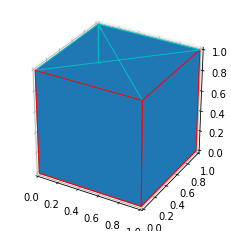

In [8]:
edges = Cuboid(0, 0, 0, 1, 1, "blue").get_edges()

fig = plt.figure()
ax = fig.gca(projection='3d')
faces = Poly3DCollection(edges, edgecolors='cr')
ax.add_collection3d(faces)
ax.set_aspect('equal')

In [28]:
edges

[[array([10, 20,  0]),
  array([20, 20,  0]),
  array([20, 10,  0]),
  array([10, 10,  0])],
 [array([10, 10, 10]),
  array([20, 10, 10]),
  array([20, 20, 10]),
  array([10, 20, 10])],
 [array([10, 10, 10]),
  array([20, 10, 10]),
  array([20, 10,  0]),
  array([10, 10,  0])],
 [array([10, 20,  0]),
  array([20, 20,  0]),
  array([20, 20, 10]),
  array([10, 20, 10])],
 [array([10, 10, 10]),
  array([10, 20, 10]),
  array([10, 20,  0]),
  array([10, 10,  0])],
 [array([20, 20,  0]),
  array([20, 20, 10]),
  array([20, 10, 10]),
  array([20, 10,  0])]]

**Plot 4 cubes using four separate actors with the same dimensions which centers in points (0,0,0), (0,10,0), (10,0,0), (10,10,0). Change their colors respectively to ‘red’,‘green’,‘blue’, ‘yellow’**

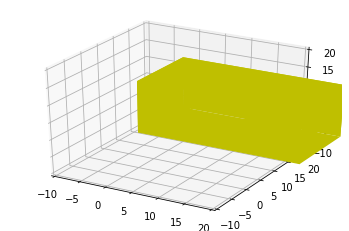

In [6]:
centers = ((0,0,0), (0,10,0), (10,0,0), (10,10,0))
color_dict = {0: "r",1: "g",2: "b", 3: "y"}

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-10, 20)
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)

# for n, center in enumerate(centers):
x, y, z = center 
edges = Cuboid(0,0,0, 30, 15, color_dict[n]).get_edges()
faces = Poly3DCollection(edges)
faces.set_facecolor(color_dict[n])
ax.add_collection3d(faces)

In [27]:
# from scipy.special import jn
# from matplotlib import cm
# from matplotlib.colors import LightSource

# centers = ((0,0,0), (0,10,0), (10,0,0), (10,10,0))
# color_dict = {0: "r",1: "g",2: "b", 3: "y"}
# # Set view parameters for all subplots.
# points = np.linspace(-10, 10, 101)
# X, Y = np.meshgrid(points, points)
# R = np.sqrt(X**2 + Y**2)
# Z = jn(0,R)
# azimuth = 45
# altitude = 60
# light = LightSource(0, 0)

# # Generate face colors for a shaded surface using either
# # a color map or the uniform rgb color specified above.

# illuminated_surface = light.shade_rgb(red, Z)

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.set_zlim(-10, 20)
# ax.set_xlim(-10, 20)
# ax.set_ylim(-10, 20)
# ax.view_init(altitude, azimuth)

# for n, center in enumerate(centers):
#     x, y, z = center 
#     edges = Cuboid(x, y, z, 10, 10, color_dict[n]).get_edges()
#     faces = Poly3DCollection(edges)
#     faces.set_facecolor(color_dict[n])
#     ax.add_collection3d(faces)

**Add 3 different lights to the scene with colors: white, blue, red.**

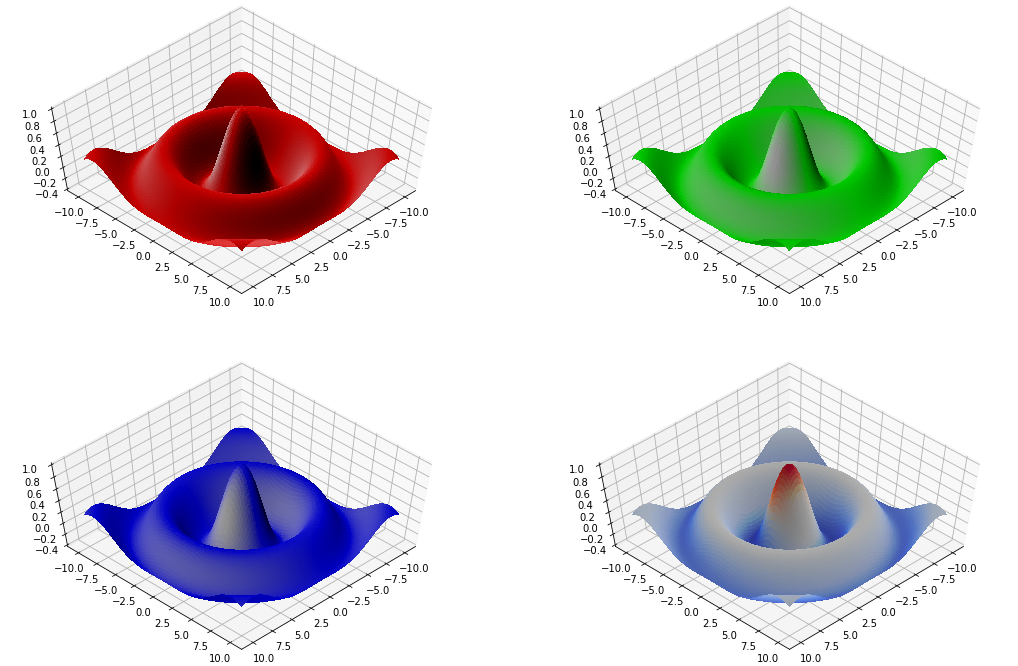

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import jn
from matplotlib import cm
from matplotlib.colors import LightSource

# Define grid of points.
points = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(points, points)
R = np.sqrt(X**2 + Y**2)
Z = jn(0,R)

# Create an rgb array for single-color surfaces.
white = np.ones((Z.shape[0], Z.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])

# Set view parameters for all subplots.
azimuth = 45
altitude = 60

# Create empty figure.
fig = plt.figure(figsize=(18,12))

# -------------------------------------------------------------------------
# Generate first subplot.
# ------------------------------------------------------------------------- 
# Create a light source object for light from
# 0 degrees azimuth, 0 degrees elevation.
light = LightSource(0, 0)

# Generate face colors for a shaded surface using either
# a color map or the uniform rgb color specified above.

illuminated_surface = light.shade_rgb(red, Z)

# Create a subplot with 3d plotting capabilities.
# This command will fail if Axes3D was not imported.
ax = fig.add_subplot(2,2,1, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# -------------------------------------------------------------------------
# Repeat the commands above for the other three subplots, but use different
# illumination angles and colors.
# ------------------------------------------------------------------------- 
light = LightSource(90, 0)
illuminated_surface = light.shade_rgb(green, Z)

ax = fig.add_subplot(2,2,2, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(90, 45)
illuminated_surface = light.shade_rgb(blue, Z)

ax = fig.add_subplot(2,2,3, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(180, 45)
illuminated_surface = light.shade(Z, cmap=cm.coolwarm)

ax = fig.add_subplot(2,2,4, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

**Change itenteraction style to Trackball**